In [1]:
# Importing required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Innoring the warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing dataset in python environment

df = pd.read_csv('C:/Users/USER/Desktop/Kaggle_DataSet/Diabetes/Diabetes.csv')

In [4]:
# Get the understanding about all the headers and nature of data set 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# In our dataset, each patient is described by the following 9 features:

Pregnancies: number of times pregnant.

Glucose: plasma glucose concentration a 2 hours in an oral glucose tolerance test.

BloodPressure: diastolic blood pressure (mm Hg).

SkinThickness triceps skin fold thickness (mm).

Insulin: 2-Hour serum insulin (mu U/ml).

BMI: body mass index (weight in kg/(height in m)^2).

DiabetesPedigreeFunction: diabetes pedigree function.

Age: age (years).

Outocme: class variable (1:diabetes, 0:no diabetes).

In [5]:
# Undertand the shpe deatiles of data

df.shape

(768, 9)

# Shape of given dataset is;

Dataset consist of 768 rows and 9 columns, we can also say that current dataset consist of 786 subject (768 ro rows)information having different subject specific 9 attribures (in columns) like 'Pregnancies' , Subject 'Glucose' count, 'BloodPressure' count, 'SkinThickness', 'Insulin', 'BMI' count, 'Age' of subjects and target as Diabetic or non-diabetic.

In [6]:
# Detailed discription of dataset

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Checking for presence of null value if any

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The dataset does not contain any null value.

In [8]:
# The values in some columns are zero, whenever we failed to aquire values for particule count we mark it as zero.

df.drop("Outcome", axis=1 ).isin([ 0 ]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [9]:
# we need to handle these count with zero, we mark it as NaN for now.

clms_missing_values = [ "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI" ]

for col in clms_missing_values:
    df[col] = df[col].replace(to_replace=0, value=np.NaN)

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# Histogram

Using histograms we can quickly visualize the distributions of the values of the features:

<function matplotlib.pyplot.show(*args, **kw)>

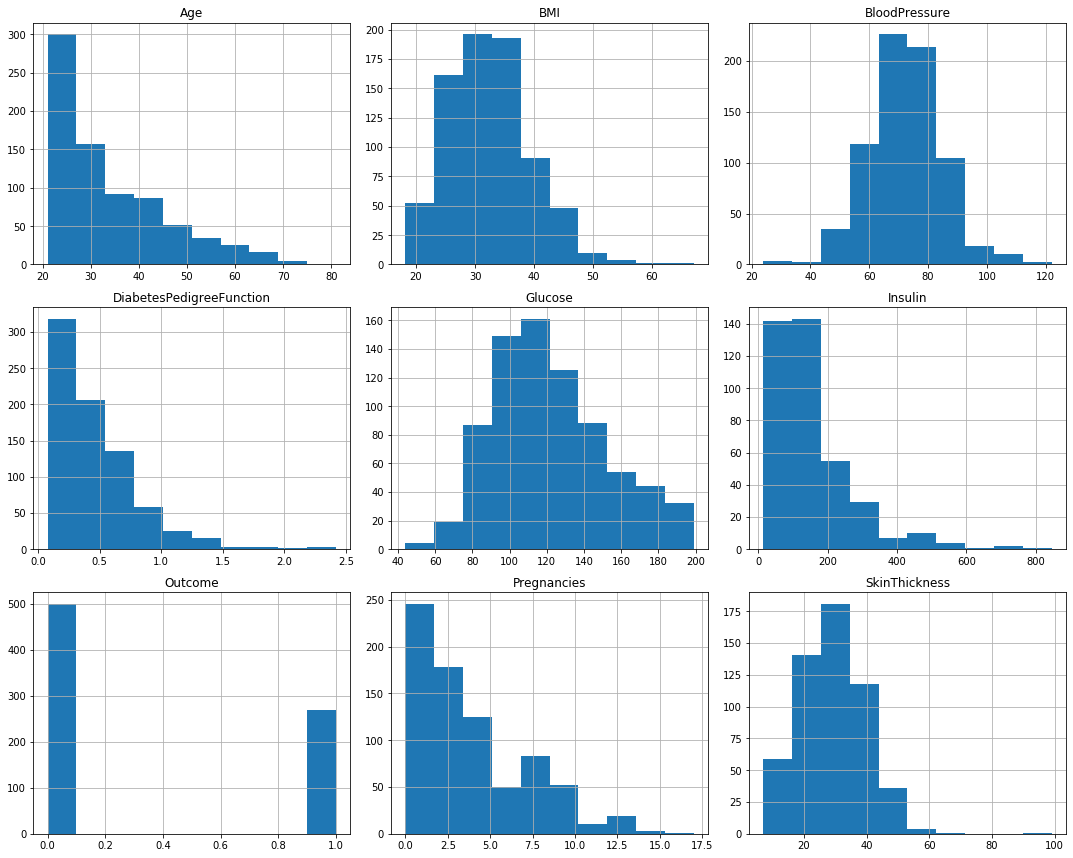

In [11]:
df.hist(figsize = (15.0, 12.0))
plt.tight_layout(True)
plt.show

The plot shows that some features, like Insulin and SkinThickness, present a peak of values at 0, which is not an admissible value for those features. So, probably, those values have been inserted where the corresponding value was missing.

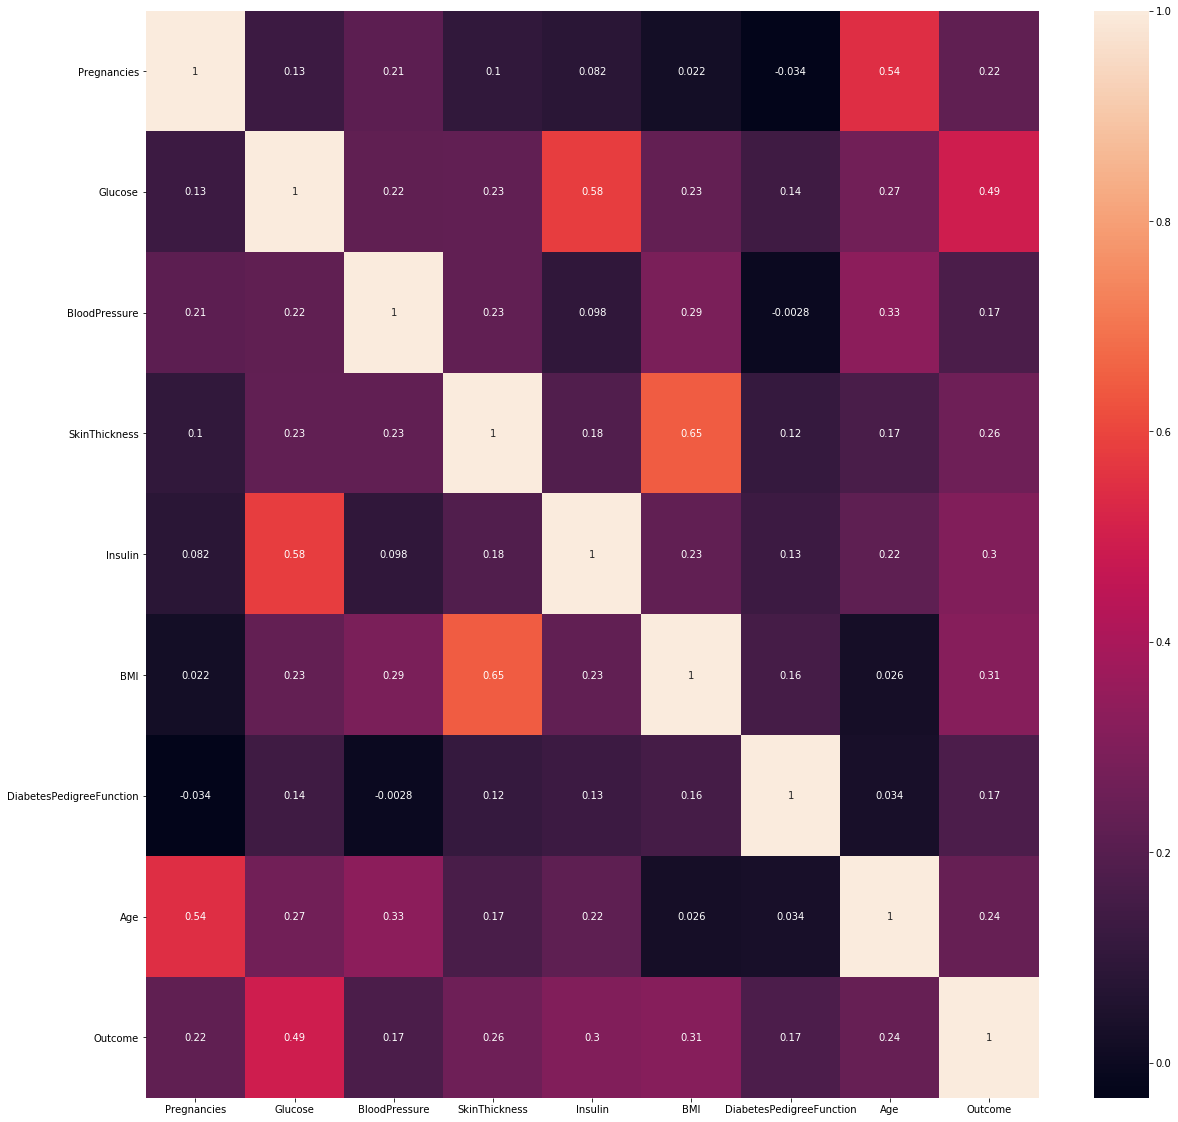

In [12]:
# We will try to understand the correlation between variables
import seaborn as sns

corrmat = df.corr()
top_features = corrmat.index

# plottting heatmap for correlation
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(), annot = True)


From the correlation matrix we can see that there no highly correlated features, but there are still some features that seem to have some sort of relationship as suggested by the correlation index value around 0.5.

Those features are:

Age - Pregnancies: this is reasonable as the number of pregnancies can only increase as the age increases.
    
Glucose - Outcome: we can deduce that an higher glucose concentration is related to an higher probability of being       diagnosed with diabetes. This is also confirmed by the additional information about diabetes reported.

Glucose - Insulin: we can deduce that when there is an higher level of glucose in the blood, the body produces more Insulin.

BMI - SkinThickness: People with an higher Body Mass Index seem to have a thicker skin.

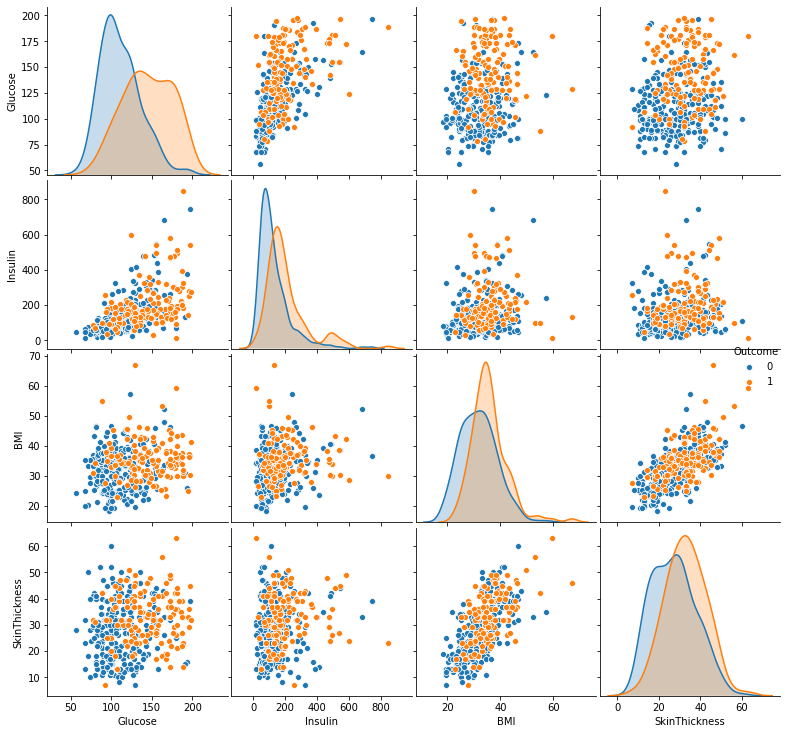

In [13]:
sns.pairplot(df.dropna(), vars=['Glucose', 'Insulin', 'BMI', 'SkinThickness' ], size= 2.5 , diag_kind='kde', hue='Outcome')
plt.tight_layout(False)
plt.show()

As we expected, the KDE-plot confirms what we have discovered looking at the correlation matrix: there seems to be a positive linear relationship between Insulin and Glucose & also between BMI and SkinThickness, where the correlation is even more clear.

By looking at the diagonal we can also see the distribution of the features separated by class. We can see that people with diabetes tend to have higher values in each of those features.

In [14]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


In [15]:
# Now we will try to understand the balance of data

db_true_cnt = len(df.loc[df['Outcome']==1])
db_flase_cnt = len(df.loc[df['Outcome']==0])
(db_true_cnt, db_flase_cnt)

(268, 500)

Here, we can understand that out data-set consist of subjects with diabetes are 268, whereas the subjects with no-diabeties are 500. We have rough distribution of 1:2. Looks our data is skewed towards non-diabetic features.

In [16]:
# we will build our independent feature matrix

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# We will also separate target function

target = ['Outcome']

In [17]:
# We will split our data-set in train and test split

from sklearn.model_selection import train_test_split

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

We have devided our available data-set in train and test set. We have obtained 30% available data in test set and remaining data will be used for trainig purpose.